# **HIERARCHICAL CLUSTERING**

**Hierarchical Clustering**, also known as **Hiearchical Cluster
Analysis(HCA)** is an unsupervised clustering algortihm that
can be categorized in two ways:

They can be **agglomerative** or
**divisive**.


# **Agglomerative Clustering**






**Agglomerative clustering** is considered as **bottom up approach**.Its data points are isolated as separate groupings initially, and then they are merged together iteratively on the basis of similarity until one cluster has been achieved.

*Four different methods are commonly used to measure similarity.*


In hierarchical clustering, **Linkages** are methods used to calculate the distance between clusters at each step of the agglomerative clustering process. Hierarchical clustering builds a tree-like structure of clusters, where the leaves of the tree represent individual data points, and the branches represent the merging of clusters.


**1). Ward's linkage:** This method states that the distance between two clusters is defined by the increase in the sum of squared after the clusters are merged.

**2). Average linkage:** This method is defined by the mean distance between two points in each cluster.

**3). Complete(or maximum)linkage:** This method is defined by the maximuM distance between two points in each cluster.

**4). Single(or minimum):** This method is defined by the minimum distance between two points in each cluster.


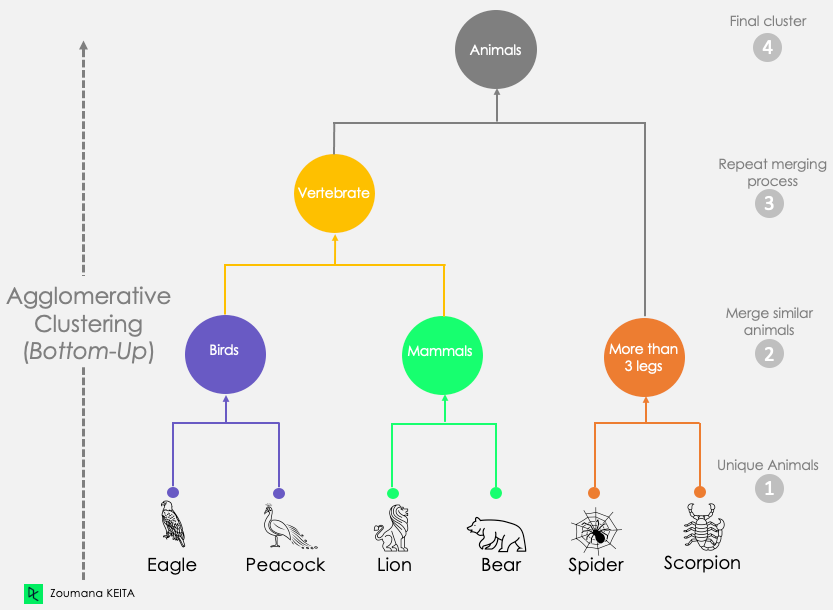

#DENDROGRAM

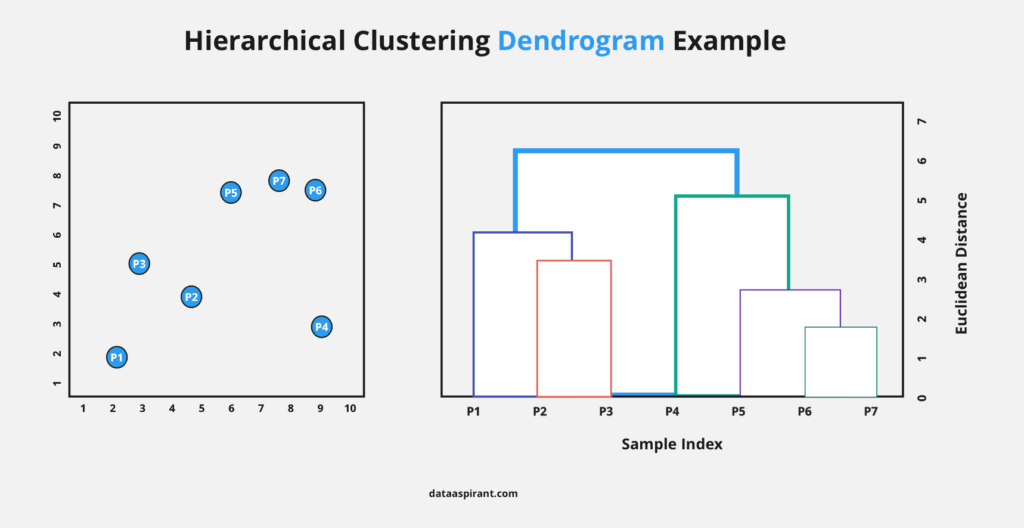

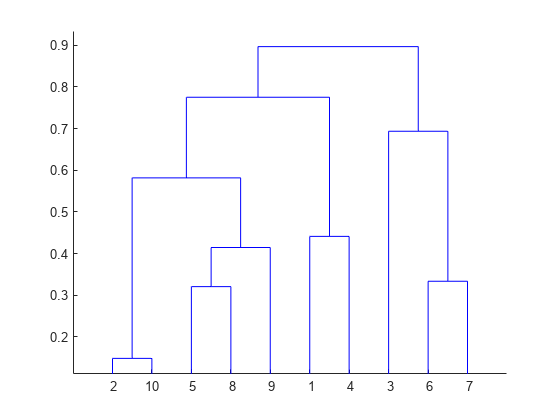

#**Divisive Clustering**

**Divisive Clustering** can be defined as the opposite of agglomerative clustering instead it takes a **top down** approach.In this case a single data cluster is divided based on the differences between data points.

Divisive clustering is not commonly used,but it is still worth nothing in the context of hiearchical clustering.These clustering processes are usually visualized using a dendrogram, a tree-like diagram that documents the merging of splitting of data points at each iteration.

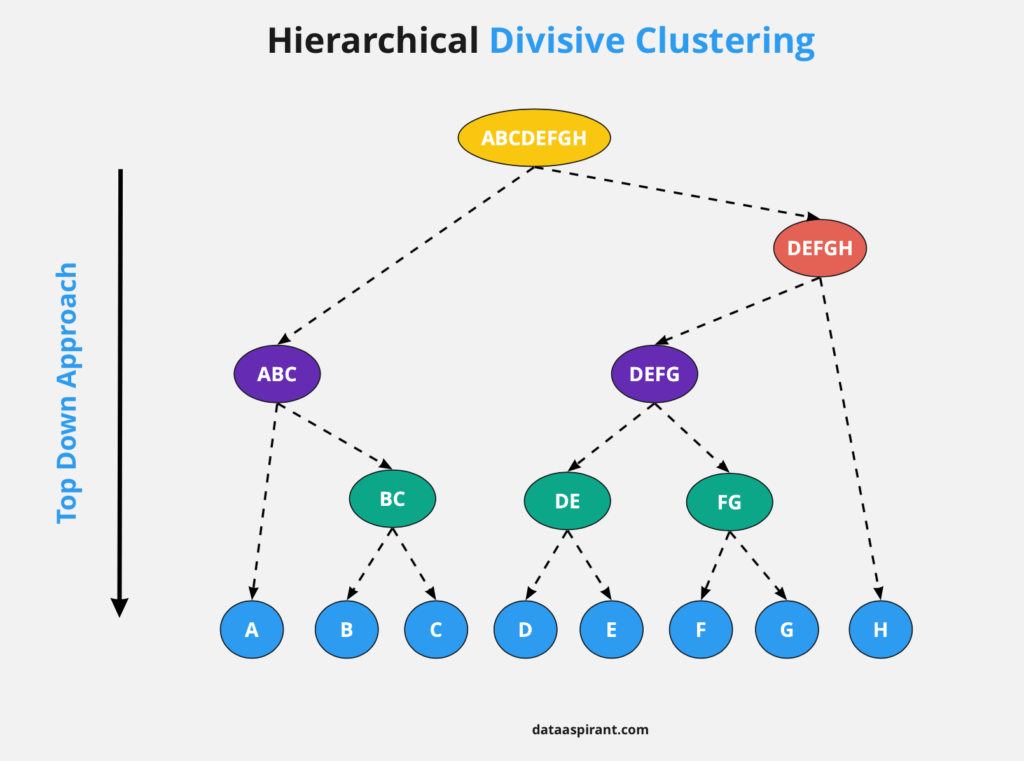

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/MACHINE LEARNING/UNSUPERWISED LEARNING/Heirarchical /Wholesale customers data (1).csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.isnull().any()

,0
Channel,False
Region,False
Fresh,False
Milk,False
Grocery,False
Frozen,False
Detergents_Paper,False
Delicassen,False


In [6]:
from sklearn.preprocessing import normalize
data_scaled1 = normalize(df)

In [7]:
data_scaled = pd.DataFrame(data_scaled1,columns=df.columns)

In [8]:
data_scaled1

array([[1.11821406e-04, 1.67732109e-04, 7.08332695e-01, ...,
        1.19648904e-02, 1.49505220e-01, 7.48085205e-02],
       [1.25321880e-04, 1.87982820e-04, 4.42198253e-01, ...,
        1.10408576e-01, 2.06342475e-01, 1.11285829e-01],
       [1.24839188e-04, 1.87258782e-04, 3.96551681e-01, ...,
        1.50119124e-01, 2.19467293e-01, 4.89619296e-01],
       ...,
       [5.01633106e-05, 7.52449659e-05, 3.64461533e-01, ...,
        1.09606834e-02, 3.72236846e-01, 4.68274505e-02],
       [9.11309417e-05, 2.73392825e-04, 9.37737390e-01, ...,
        9.45939175e-02, 1.53099982e-02, 1.93653251e-01],
       [2.41225630e-04, 7.23676891e-04, 6.72295832e-01, ...,
        1.56796660e-02, 1.15064626e-01, 1.25437328e-02]])

In [9]:
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [10]:
data_scaled.shape

(440, 8)

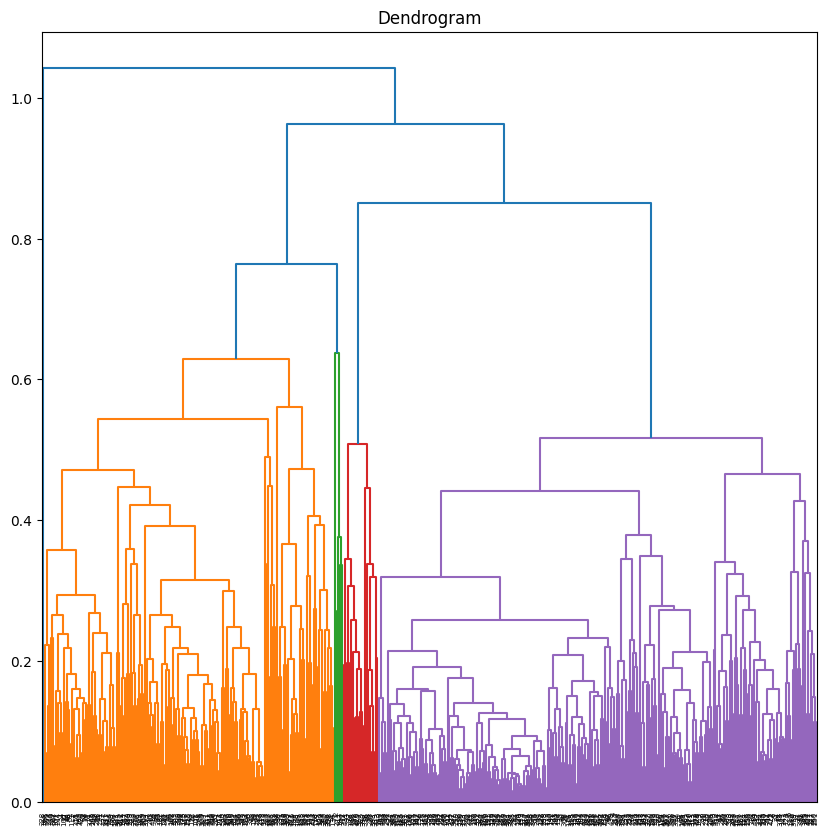

In [11]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Dendrogram')
dendrogram = sch.dendrogram(sch.linkage(data_scaled,method='average'))

In [15]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean',linkage='complete')
y = cluster.fit_predict(data_scaled)

In [16]:
cluster.labels_

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,

In [17]:
y

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,

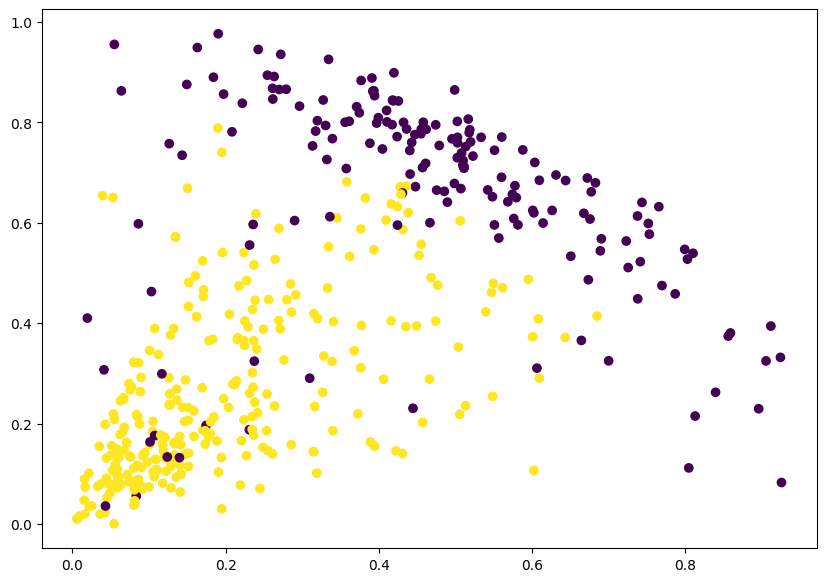

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['Milk'],data_scaled['Grocery'],c=cluster.labels_)